In [2]:
import numpy as np

In [3]:
def cubic_spline(t, y):
    m = len(t) - 1 # t and y are m+1 arrays
    # get the coefficients of the system
    h, b = [], []
    for i in range(0, m): # m array [0 - m-1]
        h.append(t[i+1] - t[i])
        b.append(6*(y[i+1] - y[i])/h[i])
    # reduce tri-diagonal system to bi-diagonal 
    u = [2*(h[1] + h[0])] 
    v = [b[1] - b[0]] # m-1 array [0 - m-2]
    for i in range(1, m):
        u.append(2*(h[i] + h[i-1])- (h[i-1])**2/u[i-1])
        v.append(b[i] - b[i-1] - (h[i-1]*v[i-1])/u[i-1])
    # solve by back-sub
    z = np.zeros(m+1) # z[0] = z[m] = 0 
    for i in range(1, m): # not including 0 and m
        z[m-i] = (v[m-i-1] - h[m-i]*z[m-i+1])/u[m-i-1] 
    # compute the S_i(x) functions
    return z, h

In [4]:
# sample spline function
def S_i(x, i, t, z, h, y):
    C = y[i+1]/h[i] - z[i+1]*h[i]/6
    D = y[i]/h[i] - z[i]*h[i]/6
    coef_1 = -z[i]/(6*h[i])
    coef_2 = z[i+1]/(6*h[i])
    return coef_1*(x-t[i+1])**3 + coef_2*(x-t[i])**3 + C*(x-t[i]) + D*(t[i+1]-x)

In [5]:
def check_x_range(x, t, m):
    for i in range(0, m):
        if x >= t[i] and x <= t[i+1]:
            return i
    return -1

In [22]:
t = np.linspace(1, 9, num=9, dtype=float)
print("t:", t)
y = [1.5, 1, 3.5, 4.5, 1, 4, 4.5, 1, 1.5] # given -> M
# y = [1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]
# x = [1.2, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 4.9] # given
x = [10, 7, 5, 3, 1, 3, 5, 7, 10] # -> V

t: [1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [23]:
n = 7+1
t_i = t[:n]
x_i = x[:n]
y_i = y[:n]

In [31]:
z_x, h_x = cubic_spline(t_i, x_i)
z_y, h_y = cubic_spline(t_i, y_i)

In [32]:
# 50 equally space points in [t_0, t_n]
num_points = 50
t_new = np.linspace(t_i[0], t_i[len(t_i)-1], num=num_points, dtype=float)

In [33]:
result_x = []
for i in range(0, num_points):
    range_index = check_x_range(t_new[i], t_i, num_points)
    if range_index != -1: 
        result_x.append(S_i(t_new[i], range_index, t_i, z_x, h_x, x_i))
    else: 
        result_x.append(-1)

result_y = []
for i in range(0, num_points):
    range_index = check_x_range(t_new[i], t_i, num_points)
    if range_index != -1: 
        result_y.append(S_i(t_new[i], range_index, t_i, z_y, h_y, y_i))
    else: 
        result_y.append(-1)

In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

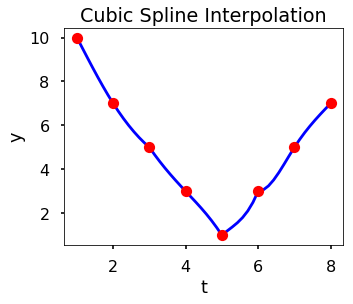

In [35]:
plt.figure(figsize = (5,4))
plt.plot(t_new, result_x, 'b')
plt.plot(t_i, x_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

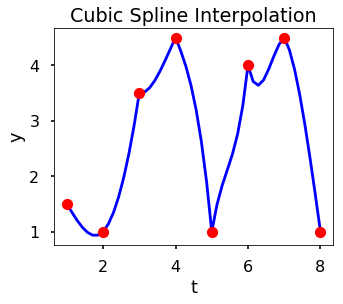

In [36]:
plt.figure(figsize = (5,4))
plt.plot(t_new, result_y, 'b')
plt.plot(t_i, y_i, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('y')
plt.show()